In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('./output_data/engineered_data.csv').drop('Unnamed: 0',axis=1)


data = pd.read_csv('./output_data/engineered_data.csv').drop('Unnamed: 0',axis=1)
corr = data.corr()['class']
corr = pd.DataFrame(corr).reset_index().rename(columns={'index':'Feature','class':'Correlation with target'})
corr['absolute'] = corr['Correlation with target'].apply(lambda x:np.abs(x))
corr = corr.sort_values(by='absolute',ascending=False).reset_index().drop('index',axis=1).drop('absolute',axis=1)

index=19

features = [i for i in list(corr.loc[:index]['Feature']) if i!='class']
X = df[features]
y = df['class']

In [2]:
features

['odor_n',
 'odor_f',
 'stalk-surface-above-ring_k',
 'stalk-surface-below-ring_k',
 'ring-type_p',
 'gill-size_n',
 'gill-size_b',
 'gill-color_b',
 'bruises_f',
 'bruises_t',
 'stalk-surface-above-ring_s',
 'spore-print-color_h',
 'ring-type_l',
 'population_v',
 'stalk-surface-below-ring_s',
 'spore-print-color_n',
 'spore-print-color_k',
 'spore-print-color_w',
 'gill-spacing_w']

In [3]:
X

,odor_n,odor_f,stalk-surface-above-ring_k,stalk-surface-below-ring_k,ring-type_p,gill-size_n,gill-size_b,gill-color_b,bruises_f,bruises_t,stalk-surface-above-ring_s,spore-print-color_h,ring-type_l,population_v,stalk-surface-below-ring_s,spore-print-color_n,spore-print-color_k,spore-print-color_w,gill-spacing_w
0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0
1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0
2,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1
3,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0
8120,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0
8121,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0
8122,0,1,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0


Results for: dt

[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

1.0





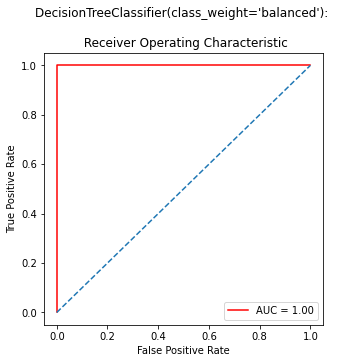

,model,accuracy score,F1 score,time,features
0,dt,1.0,1.0,0.008494,19


In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,roc_curve,auc

def model_performance(X,y):
    models = {'dt':DecisionTreeClassifier(class_weight='balanced',criterion='gini', max_features= None, splitter='best')}
    times =[]
    keys = []
    scores = []
    f1_scores = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    for k,v in models.items():
        model = v
        t0=time.time()
        model.fit(X_train, y_train)
        train_time = time.time()-t0
        t1 = time.time()
        pred = model.predict(X_test)
        predict_time = time.time()-t1
        Time_total = train_time+predict_time
        times.append(Time_total)
        print('Results for: ' + str(k) + '\n')
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))
        acc = accuracy_score(y_test, pred)
        print(acc)
        print('\n' + '\n')
        keys.append(k)
        scores.append(acc)
        f1_scores.append(f1_score(y_test,pred))
        y_prob = model.fit(X_train,y_train).predict_proba(X_test)[:,1]
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.figure(figsize=(5,5))
        plt.title(str(model)+': \n \n Receiver Operating Characteristic')
        plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],linestyle='--')
        plt.axis('tight')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
    table = pd.DataFrame({'model':keys, 'accuracy score':scores,'F1 score':f1_scores,'time':times})
    table['features'] = pd.Series([len(features) for i in range(len(scores))])
    return table

model_performance(X,y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
len(X_train)

5686

In [6]:
dt = DecisionTreeClassifier(class_weight='balanced',criterion='gini', max_features= None, splitter='best')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

### Save the Modle to file in the current working directory

In [7]:
import pickle

Pkl_Filename = "DT_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(dt, file)

### Visualize the DecisionTree

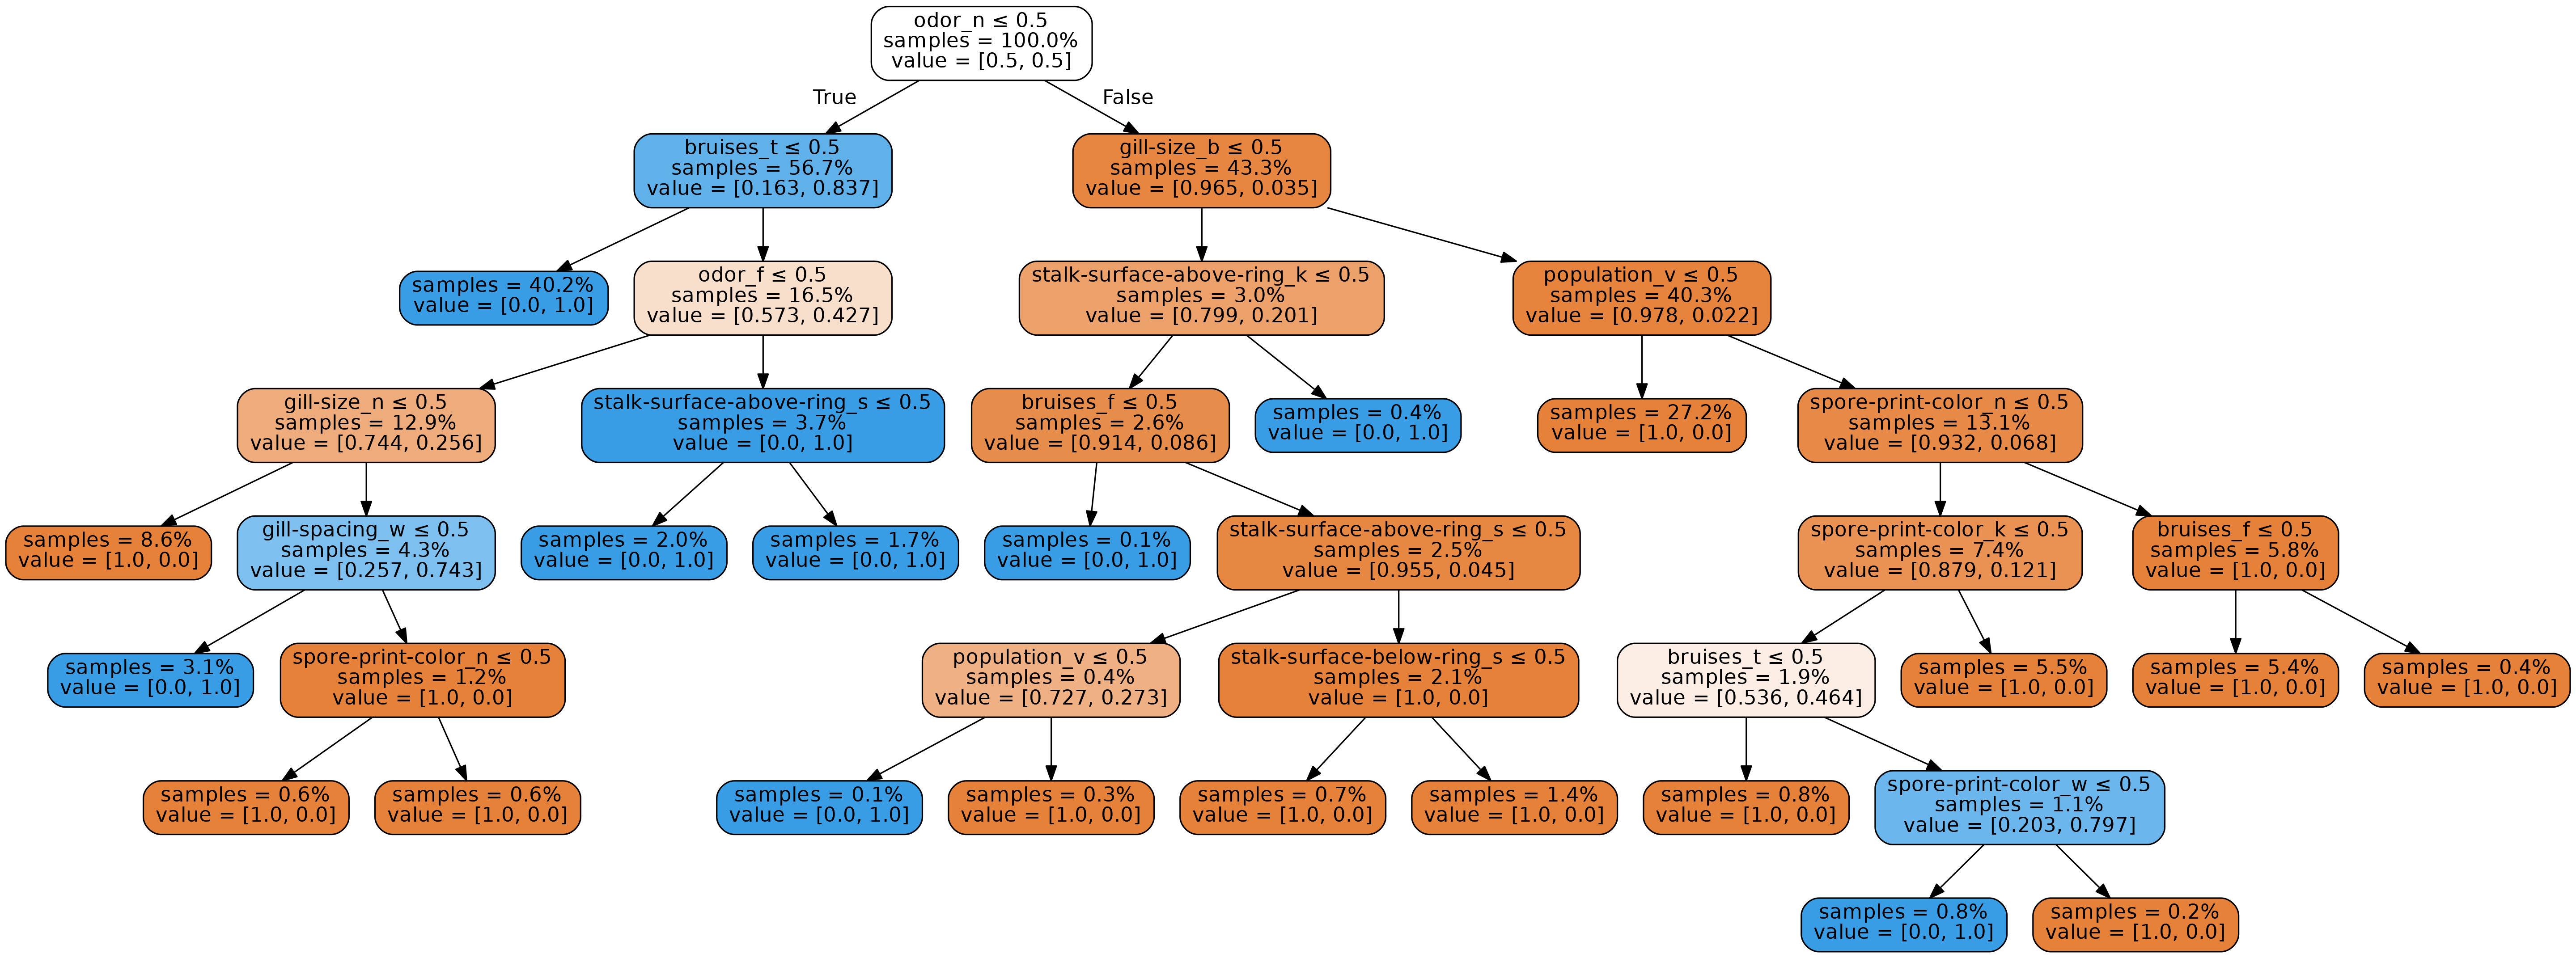

In [8]:
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,impurity=False,  
                filled=True, rounded=True,proportion=True,
                special_characters=True,feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("original_dtree.png")
graph.set_size('"60,60!"')
graph.write_png('resized_dtree.png')
Image(graph.create_png())

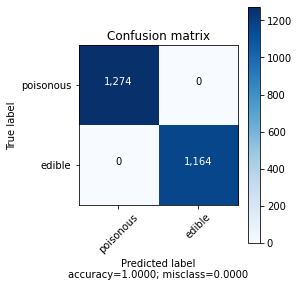

array([[1274,    0],
       [   0, 1164]])

In [9]:
import itertools

pred = dt.predict(X_test)
cm = confusion_matrix(y_test, pred)

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(4, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(confusion_matrix(y_test, pred),target_names=['poisonous','edible'],normalize=False)

cm

## Model Evaluation: 

Decision tree classifier was the model which met the criteria of the performing in the least amount of time, with the least number of features and having maximum performance metrics on F1 and accuracy scores.

| Metric                  | Value         |
|-------------------------|---------------|
| Accuracy                | 1.0           |
| F1 score                | 1.0           |
| AUC                     | 1.0           |
| Number of features used | 19 out of 112 |
| train+predict time      | 0.008494       |
| Test set size           | 2438 (30%)    |
| Train set size          | 5686 (70%)    |